In [ ]:
# Problem Statement:
#Your job is to build this fraud detection & prevention predictive model in the first step. 
#The challenging part of the problem is that the data contains very few fraud instances in comparison
#to the overall population. To give more edge to the solution they have also collected data
#regarding location [geo_scores] of the transactions, their own proprietary index [Lambda_wts], 
#on network turn around times [Qset_tats] and vulnerability qualification score [instance_scores]. 
#Training data contains masked variables pertaining to each transaction id . 
#Your prediction target here is 'Target' 
# 1: Fraudulent transactions
# 0: Clean transactions

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [2]:
# geo=pd.read_csv('/content/Geo_scores.csv')
# instance=pd.read_csv('/content/instance_scores.csv')
# lambda_wts=pd.read_csv('/content/Lambda_wts.csv')
# qset=pd.read_csv('/content/Qset_tats.csv')
# test=pd.read_csv('/content/test_share.csv')
# train=pd.read_csv('/content/train.csv')

geo=pd.read_csv('Geo_scores.csv')
instance=pd.read_csv('instance_scores.csv')
lambda_wts=pd.read_csv('Lambda_wts.csv')
qset=pd.read_csv('Qset_tats.csv')
test=pd.read_csv('test_share.csv')
train=pd.read_csv('train.csv')


In [3]:
print(geo.head(2))
print('**************************************')
print(instance.head(2))
print('**************************************')
print(lambda_wts.head(2))
print('**************************************')
print(qset.head(2))
print('**************************************')
print(test.head(2))
print('**************************************')
print(train.head(2))
print('**************************************')

       id  geo_score
0   26674       4.48
1  204314       4.48
**************************************
       id  instance_scores
0  173444            -0.88
1  259378             1.50
**************************************
    Group  lambda_wt
0  Grp936       3.41
1  Grp347      -2.88
**************************************
       id  qsets_normalized_tat
0    9983                  2.41
1  266000                  3.10
**************************************
       id   Group      Per1      Per2  Per3      Per4  Per5      Per6  Per7  \
0  146574  Grp229 -0.300000  1.540000  0.22 -0.280000  0.57  0.260000  0.70   
1  268759  Grp141  0.633333  0.953333  0.81  0.466667  0.91  0.253333  1.04   

       Per8  ...      Dem7      Dem8      Dem9     Cred1     Cred2     Cred3  \
0  1.076667  ...  0.786667  0.546667  0.313333  0.703333  0.813333  0.776667   
1  0.550000  ...  0.636667  0.770000  0.993333  0.536667  0.703333  0.806667   

      Cred4     Cred5     Cred6  Normalised_FNT  
0  0.796667 

In [4]:
print(geo.isnull().sum())
print('**************************************')
print(instance.isnull().sum())
print('**************************************')
print(lambda_wts.isnull().sum())
print('**************************************')
print(qset.isnull().sum())
print('**************************************')
print(test.isnull().sum())
print('**************************************')
print(train.isnull().sum())
print('**************************************')

# we have missing data ingeo and qset 

id               0
geo_score    71543
dtype: int64
**************************************
id                 0
instance_scores    0
dtype: int64
**************************************
Group        0
lambda_wt    0
dtype: int64
**************************************
id                           0
qsets_normalized_tat    103201
dtype: int64
**************************************
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
dtype: int64
**************************************
id                0
Group   

In [5]:
print(geo.isnull().sum()/len(geo)*100)
print('**************************************')
print(qset.isnull().sum()/len(qset)*100)
# only 5 % data missing in geo 
#7% data missing in qset 
# so we will handle it

id           0.000000
geo_score    5.023964
dtype: float64
**************************************
id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64


In [6]:
print(geo.shape)
print('**************************************')
print(instance.shape)
print('**************************************')
print(lambda_wts.shape)
print('**************************************')
print(qset.shape)
print('**************************************')
print(test.shape)
print('**************************************')
print(train.shape)
print('**************************************')

(1424035, 2)
**************************************
(1424035, 2)
**************************************
(1400, 2)
**************************************
(1424035, 2)
**************************************
(56962, 27)
**************************************
(227845, 28)
**************************************


In [7]:
print(geo['id'].nunique())
print('**************************************')
print(instance['id'].nunique())
print('**************************************')
print(lambda_wts['Group'].nunique())
print('**************************************')
print(qset['id'].nunique())
print('**************************************')
print(test['id'].nunique())
print(test['Group'].nunique())
print('**************************************')
print(train['id'].nunique())
print(train['Group'].nunique())
print('**************************************')

284807
**************************************
284807
**************************************
1400
**************************************
284807
**************************************
56962
915
**************************************
227845
1301
**************************************


In [8]:
 #227845+56962==284807:: exact ID's
 # 1301+915-- groups is not matching 1400 groups that means we have commen groups  in both train and test

In [9]:
# First we wil handle missing values
print(geo.info())
print('**************************************')
print(qset.info())

# both have float values- so we shud go by mean/median

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
**************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1424035 non-null  int64  
 1   qsets_normalized_tat  1320834 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None


In [10]:
print(geo.describe())
print('**************************************')
print(qset.describe())

                 id     geo_score
count  1.424035e+06  1.352492e+06
mean   1.424030e+05 -9.279168e-06
std    8.221673e+04  7.827199e+00
min    0.000000e+00 -1.093900e+02
25%    7.120100e+04 -5.860000e+00
50%    1.424030e+05  1.800000e-01
75%    2.136050e+05  5.860000e+00
max    2.848060e+05  4.581000e+01
**************************************
                 id  qsets_normalized_tat
count  1.424035e+06          1.320834e+06
mean   1.424030e+05          1.094006e-05
std    8.221673e+04          7.731794e+00
min    0.000000e+00         -1.404400e+02
25%    7.120100e+04         -5.860000e+00
50%    1.424030e+05          2.000000e-02
75%    2.136050e+05          5.860000e+00
max    2.848060e+05          6.110000e+01


<Axes: ylabel='geo_score'>

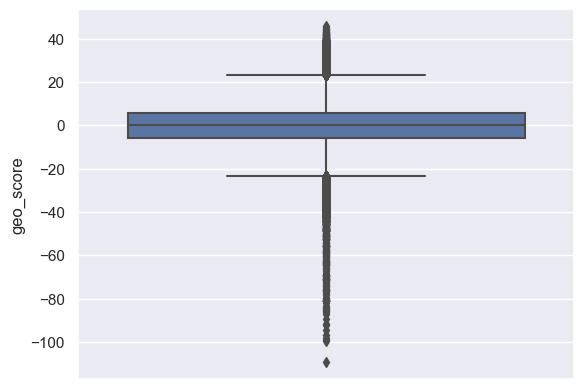

In [11]:
sns.boxplot(y='geo_score',data=geo)

<Axes: ylabel='qsets_normalized_tat'>

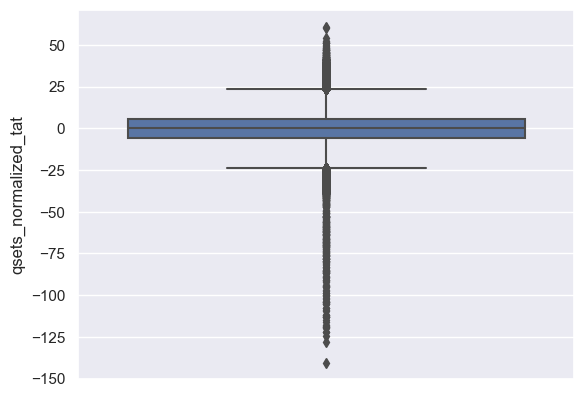

In [12]:
sns.boxplot(y='qsets_normalized_tat',data=qset)
# we have lots of outliers, we will go by median approach 

In [13]:
geo['geo_score'].mean()
# its very less

-9.279167640176816e-06

In [14]:
geo['geo_score'].median()

0.18

In [15]:
qset['qsets_normalized_tat'].mean()

1.094005756968642e-05

In [16]:
qset['qsets_normalized_tat'].median()

0.0199999999999997

In [17]:
# we will take median approach
geo.fillna(0.18,inplace=True)
qset.fillna(0.019,inplace=True)

In [18]:
print(geo.isnull().sum()/len(geo)*100)
print('**************************************')
print(qset.isnull().sum()/len(qset)*100)

# now no missing data

id           0.0
geo_score    0.0
dtype: float64
**************************************
id                      0.0
qsets_normalized_tat    0.0
dtype: float64


In [19]:
print(geo['id'].nunique())
print('**************************************')
print(instance['id'].nunique())
print('**************************************')
print(lambda_wts['Group'].nunique())
print('**************************************')
print(qset['id'].nunique())
print('**************************************')
print(test['id'].nunique())
print(test['Group'].nunique())
print('**************************************')
print(train['id'].nunique())
print(train['Group'].nunique())
print('**************************************')

284807
**************************************
284807
**************************************
1400
**************************************
284807
**************************************
56962
915
**************************************
227845
1301
**************************************


In [20]:
geo.shape  #- but unique customer id is only 284807
# so we will do groupby
#train.shape

(1424035, 2)

In [21]:
geo=geo.groupby('id').mean()
instance=instance.groupby('id').mean()
qset=qset.groupby('id').mean()

In [22]:
print(geo.shape)
print('**************************************')
print(instance.shape)
print('**************************************')
print(lambda_wts.shape)
print('**************************************')
print(qset.shape)
print('**************************************')
print(test.shape)
print('**************************************')
print(train.shape)
print('**************************************')

(284807, 1)
**************************************
(284807, 1)
**************************************
(1400, 2)
**************************************
(284807, 1)
**************************************
(56962, 27)
**************************************
(227845, 28)
**************************************


In [23]:
from pandas.core.arrays.sparse.array import printing
# Merge the data
print(train.shape)
# we have 27 and 28 in train and test

(227845, 28)


In [24]:
# adding 1-1 column
train['data']='train'
test['data']='test'
print(train.shape)
print(test.shape)

(227845, 29)
(56962, 28)


In [25]:
print(train.head(1))
print('**************************')
print(test.head(1))

       id   Group  Per1  Per2  Per3      Per4      Per5      Per6  Per7  Per8  \
0  112751  Grp169  1.07  0.58  0.48  0.766667  1.233333  1.993333  0.34  1.01   

   ...      Dem9     Cred1  Cred2     Cred3     Cred4     Cred5     Cred6  \
0  ...  0.726667  0.606667   1.01  0.933333  0.603333  0.686667  0.673333   

   Normalised_FNT  Target   data  
0         -245.75       0  train  

[1 rows x 29 columns]
**************************
       id   Group  Per1  Per2  Per3  Per4  Per5  Per6  Per7      Per8  ...  \
0  146574  Grp229  -0.3  1.54  0.22 -0.28  0.57  0.26   0.7  1.076667  ...   

       Dem8      Dem9     Cred1     Cred2     Cred3     Cred4     Cred5  \
0  0.546667  0.313333  0.703333  0.813333  0.776667  0.796667  0.823333   

      Cred6  Normalised_FNT  data  
0  0.783333         -249.75  test  

[1 rows x 28 columns]


In [26]:
# we will concatenate both train and test 
# we will know from data column which is test and train
all_data=pd.concat([train,test],axis=0)
all_data.shape
# now we are getting 284807

(284807, 29)

In [27]:
all_data['id'].nunique()
# we have all unique id's

284807

In [28]:
print(lambda_wts['Group'].nunique())
print('*******************************')
print(all_data['Group'].nunique())
# both are same

1400
*******************************
1400


In [29]:
#now we will append all thed data

all_data=pd.merge(all_data,lambda_wts,on='Group',how='left')
all_data.shape  # weight added

(284807, 30)

In [30]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.60


In [31]:
all_data=pd.merge(all_data,geo,on='id',how='left')
all_data.shape

(284807, 31)

In [32]:
all_data=pd.merge(all_data,instance,on='id',how='left')

In [33]:
all_data.shape

(284807, 32)

In [34]:
all_data=pd.merge(all_data,qset,on='id',how='left')

In [35]:
all_data.shape

(284807, 33)

In [36]:
# after appending all data
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt,geo_score,instance_scores,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,-0.13,0.256,-0.06,-0.7000
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,0.66,-0.250,0.52,0.1400
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.51,-0.950,1.56,-0.4300
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.72,0.490,0.70,-0.3024
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.60,0.850,-0.47,-0.6300


In [37]:
# Split train and test separately
train=all_data[all_data['data']=='train']
test=all_data[all_data['data']=='test']

In [38]:
train.shape,test.shape  # same as earlier

((227845, 33), (56962, 33))

In [39]:
test.isnull().sum()   # as target is null and we have appended it

id                          0
Group                       0
Per1                        0
Per2                        0
Per3                        0
Per4                        0
Per5                        0
Per6                        0
Per7                        0
Per8                        0
Per9                        0
Dem1                        0
Dem2                        0
Dem3                        0
Dem4                        0
Dem5                        0
Dem6                        0
Dem7                        0
Dem8                        0
Dem9                        0
Cred1                       0
Cred2                       0
Cred3                       0
Cred4                       0
Cred5                       0
Cred6                       0
Normalised_FNT              0
Target                  56962
data                        0
lambda_wt                   0
geo_score                   0
instance_scores             0
qsets_normalized_tat        0
dtype: int

In [40]:
# splitting into X and Y
train.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'lambda_wt', 'geo_score',
       'instance_scores', 'qsets_normalized_tat'],
      dtype='object')

In [41]:
x1=train.drop(['id','Group','Target','data'],axis=1)
y1=train['Target']


In [42]:
x1.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt,geo_score,instance_scores,qsets_normalized_tat
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,-0.13,0.256,-0.06,-0.7000
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.66,-0.250,0.52,0.1400
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.51,-0.950,1.56,-0.4300
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.72,0.490,0.70,-0.3024
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.60,0.850,-0.47,-0.6300


In [43]:
y1.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Target, dtype: float64

In [44]:
# for test--test_data means x2
test_data=test.drop(['id','Group','Target','data'],axis=1)
# y2 no need to write as we dont have Y in test and we will predict it

In [45]:
test_data.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt,geo_score,instance_scores,qsets_normalized_tat
227845,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,0.156667,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.76,0.25,-0.04,-0.4262
227846,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,0.433333,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.18,0.43,-0.77,-0.6200
227847,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,1.250000,...,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,0.39,1.32,0.11,-0.4062
227848,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,1.186667,...,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,1.80,-2.11,0.33,0.3738
227849,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,1.213333,...,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,1.89,-2.11,-0.37,-0.1300


In [46]:
x1.info()
# eveything is float so encoding not required
# missing already handles
# its a classification problem

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227845 entries, 0 to 227844
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Per1                  227845 non-null  float64
 1   Per2                  227845 non-null  float64
 2   Per3                  227845 non-null  float64
 3   Per4                  227845 non-null  float64
 4   Per5                  227845 non-null  float64
 5   Per6                  227845 non-null  float64
 6   Per7                  227845 non-null  float64
 7   Per8                  227845 non-null  float64
 8   Per9                  227845 non-null  float64
 9   Dem1                  227845 non-null  float64
 10  Dem2                  227845 non-null  float64
 11  Dem3                  227845 non-null  float64
 12  Dem4                  227845 non-null  float64
 13  Dem5                  227845 non-null  float64
 14  Dem6                  227845 non-null  float64
 15  

In [47]:
# doing the normalization of data
# Featture Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler_x=scaler.fit_transform(x1)

In [48]:
scaler_test=scaler.fit_transform(test_data)

In [49]:
scaler_test
# this will be the future prediction data

array([[-1.49603067,  1.57005823, -0.89319048, ...,  0.23899916,
        -0.03754051, -0.50593508],
       [-0.05554544,  0.52033809,  0.2829443 , ...,  0.41790649,
        -0.71456966, -0.73500229],
       [ 0.57723914,  0.13862168,  0.38261674, ...,  1.30250387,
         0.10157507, -0.48229553],
       ...,
       [ 0.63897422, -0.41009567,  0.27629947, ..., -0.53626596,
         0.60239115, -0.02581588],
       [-0.15843724,  0.87819723, -0.59417316, ...,  0.25887775,
        -0.85368524,  0.71882985],
       [ 1.168867  , -0.98863461, -1.34503887, ..., -0.66945253,
         1.45563337,  0.41600725]])

In [50]:
scaler_x

array([[ 0.61760338, -0.15994945, -0.36795308, ...,  0.24768007,
        -0.05485825, -0.82486609],
       [-0.29454707,  0.98296998,  0.42858792, ..., -0.25952338,
         0.47652766,  0.16317562],
       [ 0.70932801, -0.95634544,  0.5536646 , ..., -0.96118824,
         1.42935757, -0.50728126],
       ...,
       [ 0.60231594,  0.16225656,  0.4746688 , ...,  1.05960654,
        -0.11899103,  0.0102644 ],
       [-0.35569682,  0.63036718,  0.98155852, ..., -3.3067536 ,
        -0.60456781,  0.44994296],
       [ 0.52078294, -0.20858432,  0.5536646 , ..., -0.369785  ,
        -0.20144746,  0.64543407]])

In [51]:
scaler_test.shape

(56962, 29)

In [52]:
y1.value_counts()
# highly imbalanced data
# we will not balance and we will see precision adn recall scores not the accuracy scores
# we should not always try to balance the data as in this case we are saying that every third transaction
# is fraud if we do balancing of data. SO we will not do it and rely on precisiona nd recall scores

0.0    227451
1.0       394
Name: Target, dtype: int64

In [53]:
# how many frauds were beyond the scope
outlier_fraction=394/(227451+394)
outlier_fraction
# its very less

0.001729245759178389

# Model Building

In [54]:
# Split the data into traiig and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaler_x,y1,test_size=0.3,random_state=101)

In [55]:
# build the model
# We will use stacking method so that we can build all models at once
# stacking classifier
# also as we dont have visibility the=aths why no need for EDA as we do tknow the actual features

# Stacking Classifier

In [56]:
 # It does all models at one go
 # in real time we should use voting and stacking as its a ensemble tecniques
 # what we do is combine all models and generate a stacking model
 # stacking in used little more then voting technique
  

In [57]:
!pip install mlxtend==0.21.0

  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)


In [58]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score

In [59]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()
clf3=RandomForestClassifier()
clf4=KNeighborsClassifier()
clf5=GaussianNB()
clf6=SVC()      # we can add parameters as well if we want . we are doing default parameters

In [60]:
sclf=StackingClassifier(classifiers=[clf2,clf3,clf4,clf5,clf6],meta_classifier=clf1)
# we will not give logitis as we are comparing with first also that is logistic regression
print('5-fold cross validation : \n')

for clf, label in zip([clf2,clf3,clf4,clf5,clf6,sclf],['DT','RF','KNN','NaiveBayes','SVM','Stacking']):
  scores=cross_val_score(clf,x_train,y_train,cv=5,scoring='accuracy')
  print("Accuracy : %0.2f (+/-%0.2f)[%s]" % (scores.mean(),scores.std(),label))
  # scores_test=cross_val_score(clf,x_test,y_test,cv=5,scoring='accuracy')
  # print("Accuracy : %0.2f (+/-%0.2f)[%s]" % (scores_test.mean(),scores_test.std(),label))
  # if we want to test test data as well


5-fold cross validation : 

Accuracy : 1.00 (+/-0.00)[DT]
Accuracy : 1.00 (+/-0.00)[RF]
Accuracy : 1.00 (+/-0.00)[KNN]
Accuracy : 0.98 (+/-0.00)[NaiveBayes]
Accuracy : 1.00 (+/-0.00)[SVM]
Accuracy : 1.00 (+/-0.00)[Stacking]


In [61]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [62]:
sclf.fit(x_train,y_train)
y_pred_train=sclf.predict(x_train)
y_pred_test=sclf.predict(x_test)

print(accuracy_score(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))


1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    159200
         1.0       1.00      1.00      1.00       291

    accuracy                           1.00    159491
   macro avg       1.00      1.00      1.00    159491
weighted avg       1.00      1.00      1.00    159491

[[159200      0]
 [     0    291]]


In [63]:
final_predict=sclf.predict(test_data)  # to predit the production data

In [64]:
final_predict

array([0., 0., 0., ..., 0., 0., 0.])

# Anamoly Detection Techniques: Isolation Forest, local outlier factor,OneclassSVM

In [66]:
from sklearn.ensemble import IsolationForest  # based on rf
 # isloationforest is the best one but black box
from sklearn.neighbors import LocalOutlierFactor  # based on knn
from sklearn.svm import OneClassSVM  # based on svm

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [68]:
classification={'IsolationForest':IsolationForest(contamination=outlier_fraction),
                'LocalOutlierFactor':LocalOutlierFactor(contamination=outlier_fraction),
                'OneClassSVM':OneClassSVM()}  # rest we will keep default

In [73]:
from sklearn.metrics import classification_report
n_outlier=394    # as we have 394 frauds

for i, (clf_name,clf) in enumerate(classification.items()):
    if clf_name=='LocalOutlierFactor':
        y_pred=clf.fit_predict(scaler_x)
        score_predict=clf.negative_outlier_factor_
    elif clf_name=='OneClassSVM':
        clf.fit(scaler_x)
        y_pred=clf.predict(scaler_x)
    else:
        clf.fit(scaler_x)
        score_prediction=clf.decision_function(scaler_x)
        y_pred=clf.predict(scaler_x)
    y_pred[y_pred==1]=0   # not fraud
    y_pred[y_pred==-1]=1   # fraud
    n_error=(y_pred!=y1).sum()

    print("{} : {}".format(clf_name,n_error))
    print(accuracy_score(y1,y_pred))
    print(classification_report(y1,y_pred))
    print(confusion_matrix(y1,y_pred))
    
# as per this there are 602 frauds predicted

IsolationForest : 602
0.9973578529263315
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    227451
         1.0       0.24      0.24      0.24       394

    accuracy                           1.00    227845
   macro avg       0.62      0.62      0.62    227845
weighted avg       1.00      1.00      1.00    227845

[[227150    301]
 [   301     93]]
LocalOutlierFactor : 788
0.9965415084816432
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    227451
         1.0       0.00      0.00      0.00       394

    accuracy                           1.00    227845
   macro avg       0.50      0.50      0.50    227845
weighted avg       1.00      1.00      1.00    227845

[[227057    394]
 [   394      0]]
OneClassSVM : 113558
0.5015997717746714
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67    227451
         1.0       0.00      0.96      0.0